In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as num
import seaborn as sns



#Read the csv, drop index column
df=pd.read_csv("fraud_payment_data.csv")


In [3]:
#Drop the rows with missing values
print("Number of total rows: ", len(df))
df = df.dropna()
print("Number of rows after dropping na: ", len(df))
df = df.drop(index=df[df['USD_amount'] == 0].index)
print("Number of rows after dropping USD_amount = 0: ", len(df))

df.info()
df.columns = df.columns.str.replace(' ', '_')

Number of total rows:  1498178
Number of rows after dropping na:  1063397
Number of rows after dropping USD_amount = 0:  1063375
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063375 entries, 1 to 1498177
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1063375 non-null  object 
 1   Transaction_Id    1063375 non-null  object 
 2   Sender_Id         1063375 non-null  object 
 3   Sender_Account    1063375 non-null  object 
 4   Sender_Country    1063375 non-null  object 
 5   Sender_Sector     1063375 non-null  float64
 6   Sender_lob        1063375 non-null  object 
 7   Bene_Id           1063375 non-null  object 
 8   Bene_Account      1063375 non-null  object 
 9   Bene_Country      1063375 non-null  object 
 10  USD_amount        1063375 non-null  float64
 11  Label             1063375 non-null  float64
 12  Transaction_Type  1063375 non-null  object 
dtypes: float64(3), obj

In [4]:
#Drop first column
df = df.drop(df.columns[0], axis=1)
print(df.columns)

categories = df.select_dtypes('O').columns.astype('category')
df[categories]

for i in df.columns:
    print(f'Column --{i}-- has --{len(df[i].value_counts())}-- unique values')

df.describe()

a=(df.Label==1).value_counts()
print(a)

Index(['Transaction_Id', 'Sender_Id', 'Sender_Account', 'Sender_Country',
       'Sender_Sector', 'Sender_lob', 'Bene_Id', 'Bene_Account',
       'Bene_Country', 'USD_amount', 'Label', 'Transaction_Type'],
      dtype='object')
Column --Transaction_Id-- has --1063375-- unique values
Column --Sender_Id-- has --58423-- unique values
Column --Sender_Account-- has --73999-- unique values
Column --Sender_Country-- has --252-- unique values
Column --Sender_Sector-- has --50000-- unique values
Column --Sender_lob-- has --1-- unique values
Column --Bene_Id-- has --278068-- unique values
Column --Bene_Account-- has --293206-- unique values
Column --Bene_Country-- has --252-- unique values
Column --USD_amount-- has --100309-- unique values
Column --Label-- has --2-- unique values
Column --Transaction_Type-- has --4-- unique values
False    1041813
True       21562
Name: Label, dtype: int64


In [5]:
#Drop first column
df = df.drop(df.columns[0], axis=1)

Central tendency

In [6]:
np.random.seed(12356)

remove_n = 769000

drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)
df_subset.describe()
print((df_subset.Label==1).value_counts())
arr=((df_subset.Label==1).value_counts()).to_numpy()

b= arr[1]/arr[0]

print("%:", b*100)

categories = df.select_dtypes('O').columns.astype('category')
df[categories]




False    288408
True       5967
Name: Label, dtype: int64
%: 2.068943996005659


,Sender_Id,Sender_Account,Sender_Country,Sender_lob,Bene_Id,Bene_Account,Bene_Country,Transaction_Type
1,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,QUICK-PAYMENT
3,JPMC-CLIENT-9812,ACCOUNT-9825,USA,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,PAY-CHECK
5,JPMC-CLIENT-9763,ACCOUNT-9773,USA,CCB,JPMC-COMPANY-9765,ACCOUNT-9771,BELARUS,PAY-CHECK
10,JPMC-CLIENT-9229,ACCOUNT-9239,USA,CCB,COMPANY-9231,ACCOUNT-9237,QATAR,QUICK-PAYMENT
11,JPMC-CLIENT-9229,ACCOUNT-9240,USA,CCB,CLIENT-9247,ACCOUNT-9248,TANZANIA,MOVE-FUNDS
...,...,...,...,...,...,...,...,...
1498173,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,CCB,BILL-COMPANY-2179895,ACCOUNT-2179896,USA,MAKE-PAYMENT
1498174,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,QUICK-PAYMENT
1498175,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,CCB,BILL-COMPANY-2180022,ACCOUNT-2180023,USA,MAKE-PAYMENT
1498176,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,QUICK-PAYMENT


In [7]:
for i in df_subset[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()
large=df.nlargest(5, ['USD_amount'])
print(large)
df[numericals].var()


The categorical column --Sender_Id-- has --58423-- unique values
The categorical column --Sender_Account-- has --73999-- unique values
The categorical column --Sender_Country-- has --252-- unique values
The categorical column --Sender_lob-- has --1-- unique values
The categorical column --Bene_Id-- has --278068-- unique values
The categorical column --Bene_Account-- has --293206-- unique values
The categorical column --Bene_Country-- has --252-- unique values
The categorical column --Transaction_Type-- has --4-- unique values
                  Sender_Id   Sender_Account    Sender_Country  Sender_Sector  \
284027        CLIENT-415368   ACCOUNT-415384         SINGAPORE        44347.0   
1137088      CLIENT-1664521  ACCOUNT-1664522               USA        17398.0   
549956   JPMC-CLIENT-801171   ACCOUNT-801183               USA        40221.0   
1068317      CLIENT-1560717  ACCOUNT-1560718           MYANMAR        29013.0   
542984        CLIENT-796826   ACCOUNT-796840  FALKLAND-ISLANDS 

Sender_Sector    2.082015e+08
USD_amount       2.983459e+05
Label            1.986581e-02
dtype: float64

In [8]:
sorted_df = df.sort_values(by='USD_amount', ascending=False)
print(sorted_df.USD_amount)

284027     19927.99
1137088    19921.43
549956     19700.91
1068317    19699.39
542984     19629.81
             ...   
1096594        0.01
692555         0.01
229319         0.01
1266091        0.01
1472077        0.01
Name: USD_amount, Length: 1063375, dtype: float64


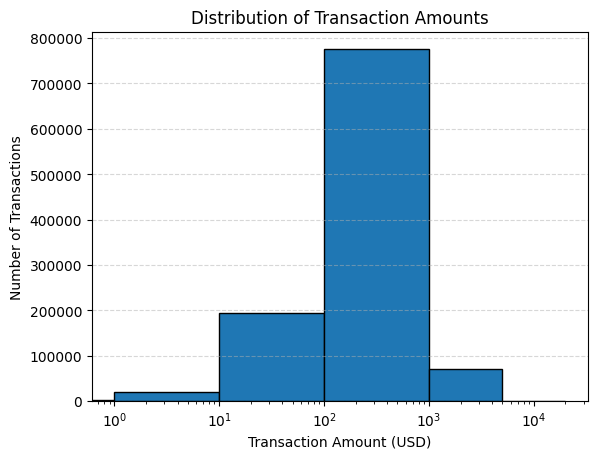

In [9]:

# Define the bin edges
bins = [0,1,10, 100, 1000, 5000,20000]
df=df.dropna()
# Plot the histogram
plt.hist(df['USD_amount'], bins=bins, align='mid',edgecolor='black')
# Set the x-axis scale to 'log'
plt.xscale('log')
# Set the axis labels and title

plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Amounts')
plt.grid(axis='y', alpha=0.5, linestyle='--')


plt.show()


Distribution by countries

In [10]:
#Get me the statistics of top 10 Sender_Country
df['Sender_Country'].value_counts().head(10)


USA               805481
GERMANY            73362
CANADA             27296
FRENCH-GUIANA        996
THAILAND             985
LIECHTENSTEIN        982
MAURITANIA           973
KUWAIT               941
JAMAICA              919
CAYMAN-ISLANDS       897
Name: Sender_Country, dtype: int64

In [11]:
#now only the fraud transactions
fraud=df[df['Label']==1]
fraud['Sender_Country'].value_counts().head(10)

USA                  16691
CANADA                 946
GERMANY                 49
SOUTH-SUDAN             38
EL-SALVADOR             37
GUAM                    36
MOZAMBIQUE              33
LIECHTENSTEIN           32
ITALY                   32
SAO-TOME-PRINCIPE       28
Name: Sender_Country, dtype: int64

In [12]:
#Get me the statistics of top 10 Bene_Country
df['Bene_Country'].value_counts().head(10)

USA                 563692
CANADA              134351
GERMANY               7886
CAYMAN-ISLANDS        1843
BRAZIL                1817
INDIA                 1776
RUSSIAN               1774
SOUTH-SUDAN           1763
FRENCH-POLYNESIA      1746
GAMBIA                1730
Name: Bene_Country, dtype: int64

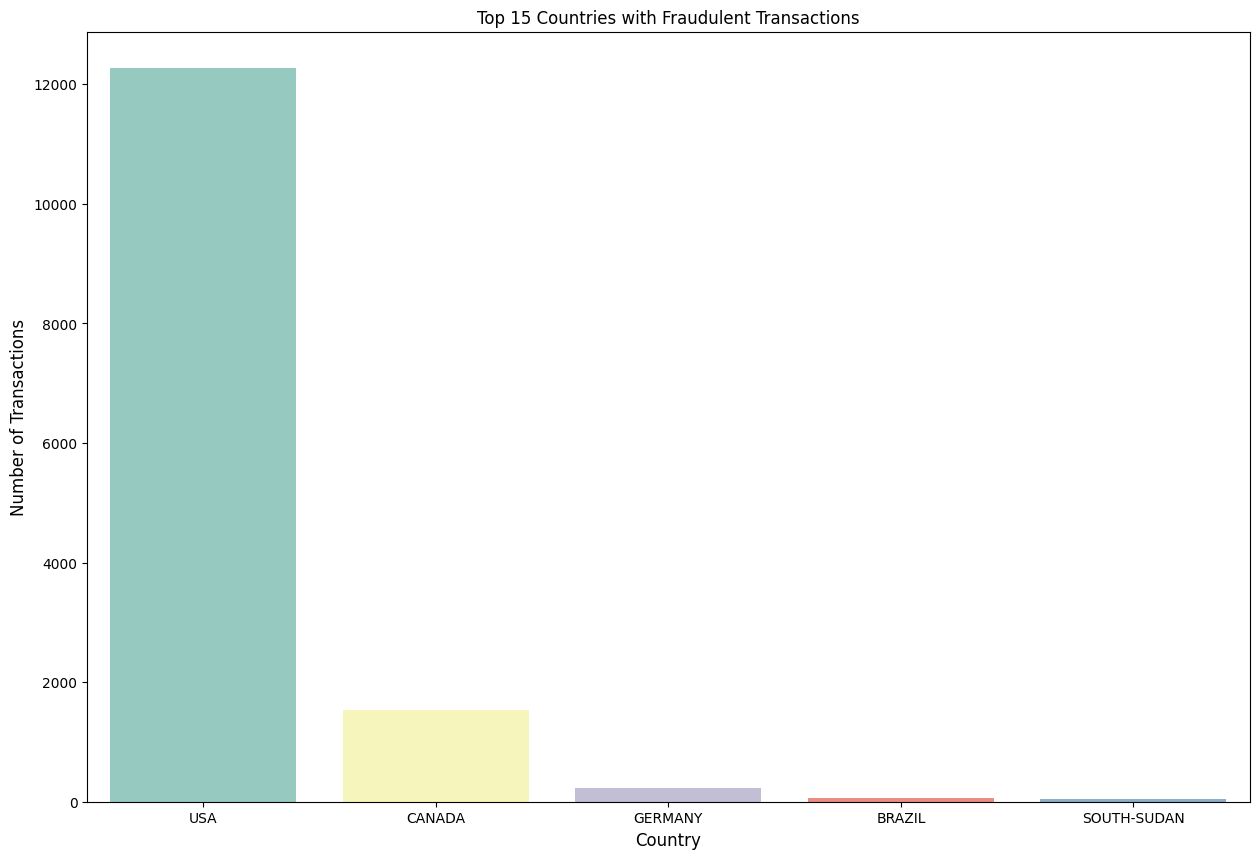

In [13]:

#in this cell we are going to create a bar chart showing the 15 top countries with the most fraudulant transactions
#First we get all the countries with fraudulant transactions
fraud_countries = df[df['Label'] == 1]['Bene_Country'].value_counts().head(5)
#Then we create a bar chart
plt.figure(figsize=(15,10))
sns.barplot(x=fraud_countries.index, y=fraud_countries.values, palette='Set3')
plt.title('Top 15 Countries with Fraudulent Transactions')
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [14]:
#make a dictionary with each column and its type
dtypes = dict(df.dtypes)
print(dtypes)


{'Sender_Id': dtype('O'), 'Sender_Account': dtype('O'), 'Sender_Country': dtype('O'), 'Sender_Sector': dtype('float64'), 'Sender_lob': dtype('O'), 'Bene_Id': dtype('O'), 'Bene_Account': dtype('O'), 'Bene_Country': dtype('O'), 'USD_amount': dtype('float64'), 'Label': dtype('float64'), 'Transaction_Type': dtype('O')}


               Sender_Sector  USD_amount     Label
Sender_Sector       1.000000    0.000013  0.000275
USD_amount          0.000013    1.000000  0.059918
Label               0.000275    0.059918  1.000000


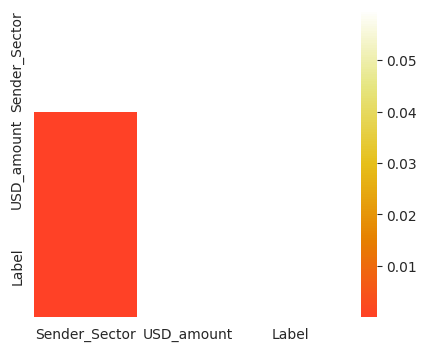

In [15]:
corr = df.corr()
print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

In [16]:
#count all the rows which have missing value Null OR NaN in all of these columns: Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob
null_count = df['Sender_Id'].isnull().sum() 
print(null_count)

0


In [22]:
#agrupa en un nuevo dataset los datos de cada Sender_Account
df_sender=df.groupby('Sender_Account')
df_sender.head()

,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
1,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0.0,QUICK-PAYMENT
3,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0.0,PAY-CHECK
5,JPMC-CLIENT-9763,ACCOUNT-9773,USA,14645.0,CCB,JPMC-COMPANY-9765,ACCOUNT-9771,BELARUS,543.87,0.0,PAY-CHECK
10,JPMC-CLIENT-9229,ACCOUNT-9239,USA,34576.0,CCB,COMPANY-9231,ACCOUNT-9237,QATAR,265.66,0.0,QUICK-PAYMENT
11,JPMC-CLIENT-9229,ACCOUNT-9240,USA,39807.0,CCB,CLIENT-9247,ACCOUNT-9248,TANZANIA,682.50,0.0,MOVE-FUNDS
...,...,...,...,...,...,...,...,...,...,...,...
1498023,BILL-COMPANY-2184254,ACCOUNT-2184255,MALTA,25754.0,CCB,JPMC-CLIENT-2184056,ACCOUNT-2184137,USA,646.79,1.0,QUICK-PAYMENT
1498041,BILL-COMPANY-2182787,ACCOUNT-2182788,SAMOA,37733.0,CCB,JPMC-CLIENT-2182642,ACCOUNT-2182653,USA,702.05,0.0,QUICK-PAYMENT
1498042,BILL-COMPANY-2178060,ACCOUNT-2178061,USA,43494.0,CCB,JPMC-CLIENT-2177971,ACCOUNT-2178099,USA,827.89,0.0,QUICK-PAYMENT
1498144,BILL-COMPANY-2181246,ACCOUNT-2181247,SAUDI-ARABIA,10588.0,CCB,JPMC-CLIENT-2181147,ACCOUNT-2181157,USA,325.40,0.0,MAKE-PAYMENT
